In [1]:
import Mars
import numpy as np
from matplotlib import pyplot as plt

In [2]:
H2esc = Mars.MarsHydrogenEscape()

In [3]:
ocean_GEL_cm = 200.0e2
P_CO2_bars = 1.
P_N2_bars = 1.
Fe_react_frac = 1.
yr = 365*24*60*60
x = [ocean_GEL_cm, P_CO2_bars, P_N2_bars, Fe_react_frac]
%timeit H2esc.WarmTimeAfterSeveralImpacts(x)

270 µs ± 2.88 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
ocean_GEL_cm = 200e2
P_CO2_bars = 1
P_N2_bars = 1
Fe_react_frac = np.logspace(-3,0,15)
time = []
for Fe in Fe_react_frac:
    x = [ocean_GEL_cm, P_CO2_bars, P_N2_bars, \
        Fe]
    time.append(H2esc.WarmTimeAfterSeveralImpacts(x)/yr)

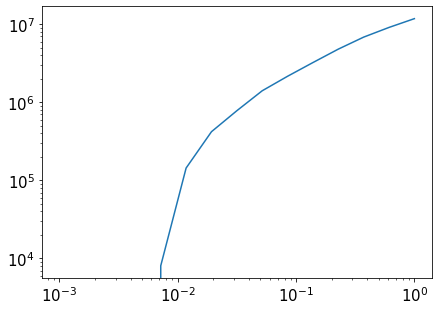

In [5]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[7,5])
ax.plot(Fe_react_frac,time)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

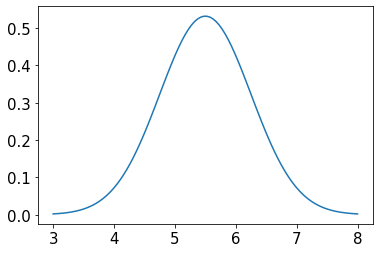

In [7]:
from scipy.stats import norm
# low = 4
# high = 7
warm_time_mean = 5.5
warm_time_std = 0.75

dist = norm(warm_time_mean,warm_time_std)

twarm = np.linspace(3,8,100)
p = dist.pdf(twarm)

plt.plot(twarm,p)
plt.show()

In [8]:
from scipy import optimize

def log_likelihood(theta, y, yerr):
    
    LOG10ocean_GEL_cm, \
    LOG10P_CO2_bars, \
    LOG10P_N2_bars, \
    LOG10Fe_react_frac  = theta
    
    x = [10.0**LOG10ocean_GEL_cm, 10.0**LOG10P_CO2_bars, \
         10.0**LOG10P_N2_bars, 10.0**LOG10Fe_react_frac]
    
    model = np.log10(max(H2esc.WarmTimeAfterSeveralImpacts(x)/yr,1e-10))
    
    sigma2 = yerr ** 2 
    
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

In [9]:
LOG10ocean_GEL_cm = np.log10(200e2)
LOG10P_CO2_bars = np.log10(1)
LOG10P_N2_bars = np.log10(1)
LOG10Fe_react_frac = np.log10(.01)

theta = np.array([LOG10ocean_GEL_cm, LOG10P_CO2_bars, \
                  LOG10P_N2_bars, LOG10Fe_react_frac])
y = np.array([warm_time_mean])
yerr = np.array([warm_time_std])

nll = lambda *args: -log_likelihood(*args)


In [10]:
soln = optimize.minimize(nll,theta,args=(y,yerr))